<a href="https://colab.research.google.com/github/shravanigadige09/employees-bunrout/blob/main/Employees_burnrate_analysis_and_prediction_by_vijaya_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing modules for the project**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# for manupulation
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for preprocessing
from sklearn import preprocessing

# for spliting dataset
from sklearn.model_selection import train_test_split

# for dimension re
from sklearn.decomposition import PCA

# for calucating accuracy score
from sklearn.metrics import r2_score

# Algorithm
from sklearn.ensemble import RandomForestRegressor

Reading the dataset and understanding


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copy of dataset.csv")
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Convert data object into data time type

In [ ]:
df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])

**Removing the null values**
- we will replace the null value with mean value of that column

In [ ]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
df["Resource Allocation"].fillna(df["Resource Allocation"].mean(),inplace = True)
df["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].mean(),inplace = True)
df["Burn Rate"].fillna(df["Burn Rate"].mean(),inplace = True)

In [ ]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

**Removing unwanted columns**
- here we can remove ID columns

In [ ]:
df = df.drop(['Employee ID'],axis = 1)

In [ ]:
# finding skewness in our numercial columns
print(df["Designation"].skew(), "-> Normally distributed")
print(df["Resource Allocation"].skew(),"-> positively Skewed")
print(df["Mental Fatigue Score"].skew(),"-> negtively skewed")
print(df["Burn Rate"].skew(),"-> Normally distributed")

0.09242138478903683 -> Normally distributed
0.2110787436948646 -> positively Skewed
-0.45245780687704834 -> negtively skewed
0.046910742768045674 -> Normally distributed


**seeing the correlation between every columns**

In [ ]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


**Visualizating the columns**

In [ ]:
columns_list = list(df.columns)
for i in range(len(columns_list)):
    if i == 0 or i == 1:
        continue
    fig = px.histogram(df[columns_list[i]], x=columns_list[i], title="Plot Distribution of " + columns_list[i], color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.5)
    fig.show()











In [ ]:
#
fig = px.line(df,y="Burn Rate",color="Designation",title="Burn rate on the basis of Designation")
fig.update_layout(bargap=0.1)
fig.show()














In [ ]:
fig = px.line(df,y="Burn Rate",color="Gender",title="Burn rate on the basis of Gender")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.line(df,y="Mental Fatigue Score",color="Designation",title="Mental Fatique Vs Designation")
fig.update_layout(bargap=0.1)
fig.show()

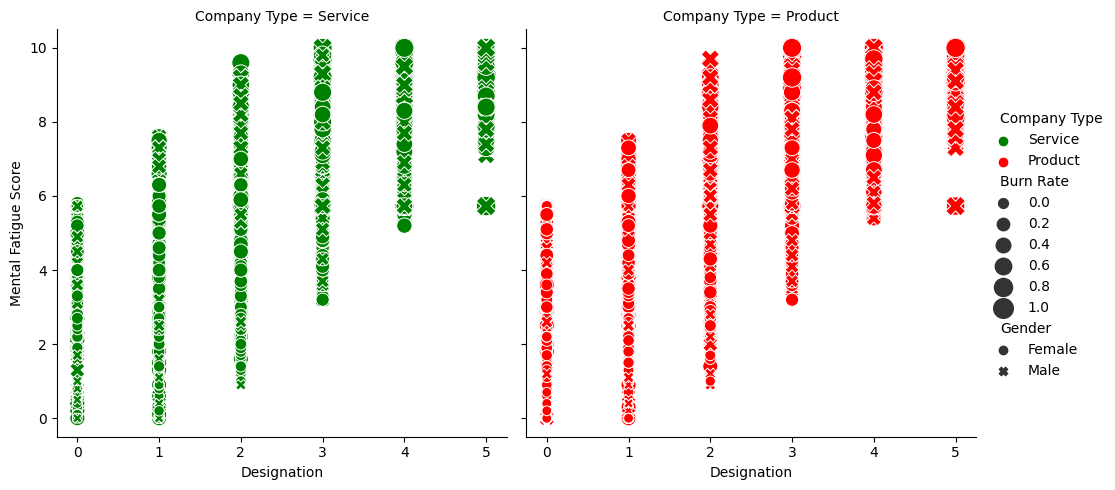

In [ ]:
sns.relplot(
    data = df,x="Designation",y="Mental Fatigue Score",
    col ="Company Type", hue ="Company Type",size="Burn Rate",
    style="Gender",palette=["g","r"],sizes=(50,200)
)









In [ ]:
label_encode = preprocessing.LabelEncoder()

df['GenderLabel'] = label_encode.fit_transform(df["Gender"].values)
df['WFH Setup AvailableLabel'] = label_encode.fit_transform(df["WFH Setup Available"].values)
df['Company_TypeLabel'] = label_encode.fit_transform(df["Company Type"].values)

In [ ]:
df.sample(5)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,WFH Setup AvailableLabel,Company_TypeLabel
12895,2008-09-02,Female,Product,Yes,2,3.0,2.400000,0.09,0,1,0
6753,2008-12-31,Male,Product,Yes,0,1.0,1.000000,0.02,1,1,0
4,2008-07-24,Female,Service,No,3,7.0,6.900000,0.52,0,0,1
20960,2008-10-11,Female,Product,Yes,2,3.0,5.700000,0.47,0,1,0
20427,2008-08-20,Male,Product,No,3,5.0,5.728188,0.61,1,0,0


**Spliting the Input columns and target columns**

In [ ]:
X = df.drop(columns=['Burn Rate','Date of Joining',"Gender",'Company Type','WFH Setup Available'])
y = df["Burn Rate"]

In [ ]:
X.shape

(22750, 6)

**Performing the dimension reduction**
- here i will use the PCA techniques

In [ ]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [ ]:
print("before",X.shape,"after",X_pca.shape,)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

before (22750, 6) after (22750, 4)
[0.78371089 0.11113597 0.03044541 0.02632422]
4


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_pca,y,test_size=0.25,random_state=10)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


**Applying Alogrithm**
- using RandomForestRegressor algorithm

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

**Finding the Accuracy score**

In [ ]:
train_y_pred = rf_model.predict(X_train)
train_score = r2_score(Y_train,train_y_pred)
test_y_pred = rf_model.predict(X_test)
test_score = r2_score(Y_test,test_y_pred)

print("Accuracy Score of train data : "+str(round(100*train_score,3))+"%")
print("Accuracy Score of test data : "+str(round(100*test_score,3))+"%")

Accuracy Score of train data : 91.189%
Accuracy Score of test data : 83.836%
